### Installing and Importing dependencies

In [ ]:
!pip install wordcloud
!pip install spacy
!pip install --upgrade spacy pydantic typing-extensions


In [ ]:
!pip install textblob

In [37]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 28.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip install xgboost

     ---------------------------------------- 99.7/99.7 MB 2.7 MB/s eta 0:00:00


In [1]:
import nltk
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import os
import warnings
from sklearn.model_selection import train_test_split

### Data Exploration

In [3]:
df=pd.read_csv("IMDB Dataset.csv")

In [4]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

There are no missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

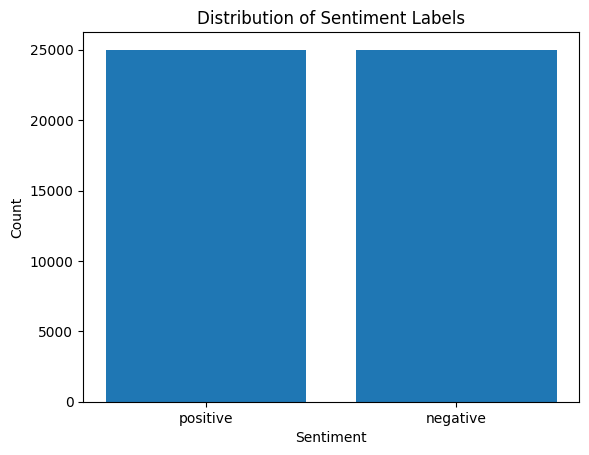

In [8]:
# Check the distribution of sentiment labels
sentiment_counts = df['sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')
plt.show()

The dataset is balanced

## Data preprocessing

In [9]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
df['review']=df['review'].apply(denoise_text)

<ipython-input-9-42f188a2b446>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [10]:
#removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
df['review']=df['review'].apply(remove_special_characters)

In [11]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
df['review']=df['review'].apply(simple_stemmer)

In [12]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [13]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
#Apply function on review column
df['review']=df['review'].apply(remove_stopwords)

{'was', 'off', 'so', 'm', 'into', 'has', 'those', 'with', 'than', 'isn', 's', "should've", 'weren', 'doing', 'the', 'shan', "needn't", 'its', 'don', "won't", 'an', 'this', 'such', "she's", "didn't", 'each', "wasn't", 'did', 'he', 'whom', 'few', "you've", "you'd", 'll', 'been', 'needn', "you're", 'or', 'same', 'of', 'further', 'will', 'couldn', 'what', 'above', 'hadn', 'any', "it's", 'during', 'hers', 'yourselves', 't', 'both', 'because', 'me', 'it', "mightn't", 'about', 'for', 'can', "doesn't", 'doesn', 'down', 'as', 'if', 'just', 'which', 'are', 'that', 'how', 'very', 'ours', 'am', 'you', 'yourself', "aren't", 'under', 'hasn', 'more', 'she', "don't", 'is', "shan't", 'having', 'own', 'my', 'nor', 'on', 'shouldn', "weren't", 'mightn', 'after', 'itself', 'does', 'where', 'there', 've', 'had', 'themselves', 'not', 'over', 'y', 'wouldn', "haven't", "wouldn't", 'they', "that'll", 'here', 'until', 'once', 'no', 'to', 'o', "hadn't", 'won', 're', 'wasn', 'all', 'when', 'we', 'ain', 'himself', 

Removing English Abreviations

In [14]:
def remove_abbriviations(text):
    text = re.sub(r'won\'t', 'will not', text)
    text = re.sub(r'can\'t', 'cannot', text)
    text = re.sub(r'i\'m', 'i am', text)
    text = re.sub(r'ain\'t', 'is not', text)
    text = re.sub(r'(\w+)\'ll', '\g<1> will', text)
    text = re.sub(r'(\w+)n\'t', '\g<1> not', text)
    text = re.sub(r'(\w+)\'ve', '\g<1> have', text)
    text = re.sub(r'(\w+)\'s', '\g<1> is', text)
    text = re.sub(r'(\w+)\'re', '\g<1> are', text)
    text = re.sub(r'(\w+)\'d', '\g<1> would', text)
    text = re.sub(r'don\'t', 'do not', text)
    text = re.sub(r'doesn\'t', 'does not', text)
    text = re.sub(r'didn\'t', 'did not', text)
    text = re.sub(r'haven\'t', 'have not', text)
    text = re.sub(r'hasn\'t', 'has not', text)
    text = re.sub(r'hadn\'t', 'had not', text)
    text = re.sub(r'wouldn\'t', 'would not', text)
    text = re.sub(r'shouldn\'t', 'should not', text)
    text = re.sub(r'mustn\'t', 'must not', text)
    text = re.sub(r'needn\'t', 'need not', text)
    text = re.sub(r'it\'s', 'it is', text)
    text = re.sub(r'they\'re', 'they are', text)
    text = re.sub(r'we\'re', 'we are', text)
    text = re.sub(r'you\'re', 'you are', text)
    text = re.sub(r'he\'s', 'he is', text)
    text = re.sub(r'she\'s', 'she is', text)
    text = re.sub(r'we\'ll', 'we will', text)
    text = re.sub(r'you\'ll', 'you will', text)
    text = re.sub(r'they\'ll', 'they will', text)
    return text

df['review']=df['review'].apply(lambda z: remove_abbriviations(z))

## EDA

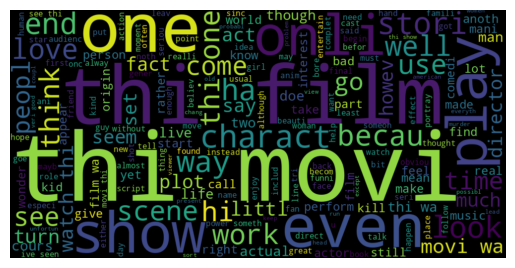

In [15]:
words = []
for message in df['review']:
    words.extend([word for word in message.split() if word not in STOPWORDS])

wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
all_words=[]
for sentence in df['review']:
    all_words.extend(sentence.split())
nltk.FreqDist(all_words)

FreqDist({'thi': 145461, 'movi': 98936, 'wa': 95201, 'film': 92059, 'hi': 57279, 'one': 52649, 'like': 43820, 'ha': 33150, 'time': 29798, 'good': 28899, ...})

In [17]:
df['word_count'] = df['review'].apply(lambda x: len(str(x).split()) )
df['character_count'] = df['review'].apply(lambda x: len(x))
df

,review,sentiment,word_count,character_count
0,one review ha mention watch 1 oz episod youll ...,positive,175,1073
1,wonder littl product film techniqu veri unassu...,positive,91,595
2,thought thi wa wonder way spend time hot summe...,positive,94,560
3,basic famili littl boy jake think zombi hi clo...,negative,67,405
4,petter mattei love time money visual stun film...,positive,130,787
...,...,...,...,...
49995,thought thi movi right good job wasnt creativ ...,positive,93,536
49996,bad plot bad dialogu bad act idiot direct anno...,negative,65,398
49997,cathol taught parochi elementari school nun ta...,negative,124,772
49998,im go disagre previou comment side maltin thi ...,negative,124,773


In [18]:
X=df['review']
y=df['sentiment']
# split into train and test sets To prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


In [19]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit the encoder on the target labels (y_train) and transform them
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now, y_train_encoded and y_test_encoded contain numerical labels (0 and 1)


## TF-IDF Vectorizer

In [20]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
#Only for the reviews
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Display the shapes of the resulting TF-IDF matrices and data splits
print('Training data shape (TF-IDF):', X_train_tfidf.shape, y_train.shape)
print('Testing data shape (TF-IDF):', X_test_tfidf.shape, y_test.shape)

Training data shape (TF-IDF): (33500, 5000) (33500,)
Testing data shape (TF-IDF): (16500, 5000) (16500,)


## Predictive modeling with machine learning

### SVM

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
# Step 4: Train the SVM model
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)
# Step 6: Predict sentiment on new data
predictions = svm.predict(X_test_tfidf)
# Step 7: Generate the classification report to evaluate the model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    negative       0.90      0.87      0.88      8227
    positive       0.88      0.90      0.89      8273

    accuracy                           0.89     16500
   macro avg       0.89      0.89      0.89     16500
weighted avg       0.89      0.89      0.89     16500



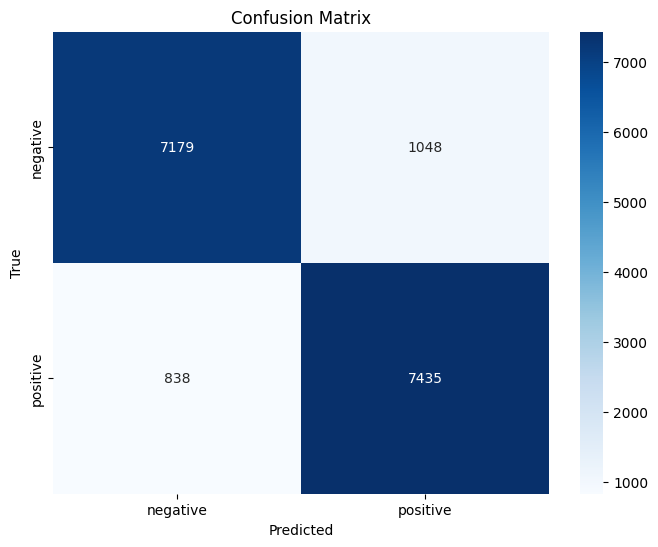

In [27]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
# Step 4: Train the SVM model
lr = LogisticRegression()
lr.fit(X_train_tfidf,y_train)
# Step 6: Predict sentiment on new data
predictionLr=lr.predict(X_test_tfidf)
# Step 7: Generate the classification report to evaluate the model
print(classification_report(y_test, predictionLr))

              precision    recall  f1-score   support

    negative       0.90      0.87      0.89      8227
    positive       0.88      0.90      0.89      8273

    accuracy                           0.89     16500
   macro avg       0.89      0.89      0.89     16500
weighted avg       0.89      0.89      0.89     16500



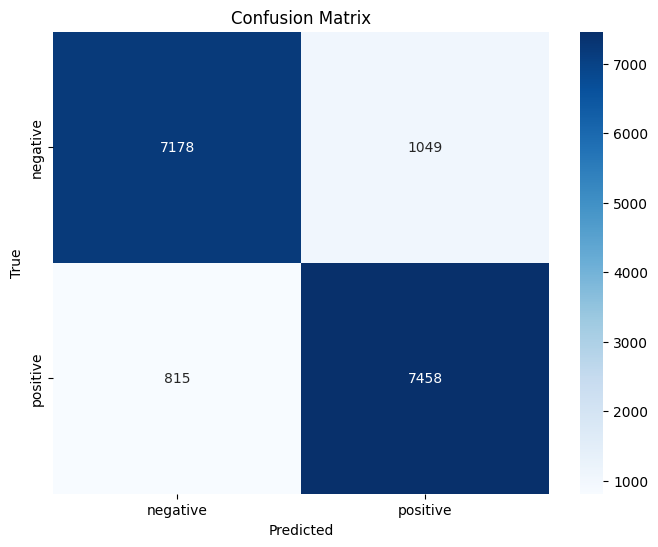

In [28]:
# Calculate the confusion matrix
conf_matrixLR = confusion_matrix(y_test, predictionLr)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrixLR, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Naive Bayes

In [25]:
from sklearn.naive_bayes import MultinomialNB
# Step 4: Train the SVM model
mnb= MultinomialNB()
mnb.fit(X_train_tfidf,y_train)
# Step 6: Predict sentiment on new data
predictionNB=mnb.predict(X_test_tfidf)
# Step 7: Generate the classification report to evaluate the model
print(classification_report(y_test, predictionNB))

              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      8227
    positive       0.85      0.85      0.85      8273

    accuracy                           0.85     16500
   macro avg       0.85      0.85      0.85     16500
weighted avg       0.85      0.85      0.85     16500



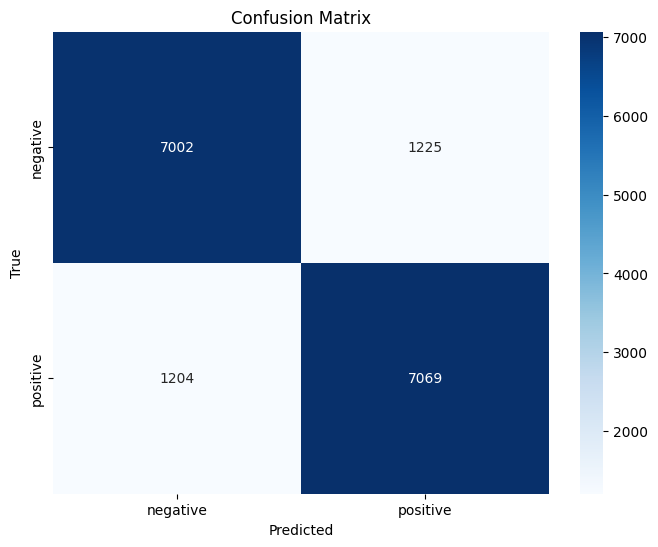

In [29]:
# Calculate the confusion matrix
conf_matrixNB = confusion_matrix(y_test, predictionNB)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrixNB, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### XGBOOST

In [32]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report

# Create and train the XGBoost model
xgb = XGBClassifier()
xgb.fit(X_train_tfidf, y_train_encoded)

# Predict on the test data
predictionXGB = xgb.predict(X_test_tfidf)

# Generate the classification report to evaluate the model
print(classification_report(y_test_encoded, predictionXGB))


              precision    recall  f1-score   support

           0       0.87      0.84      0.85      8227
           1       0.84      0.88      0.86      8273

    accuracy                           0.86     16500
   macro avg       0.86      0.86      0.86     16500
weighted avg       0.86      0.86      0.86     16500



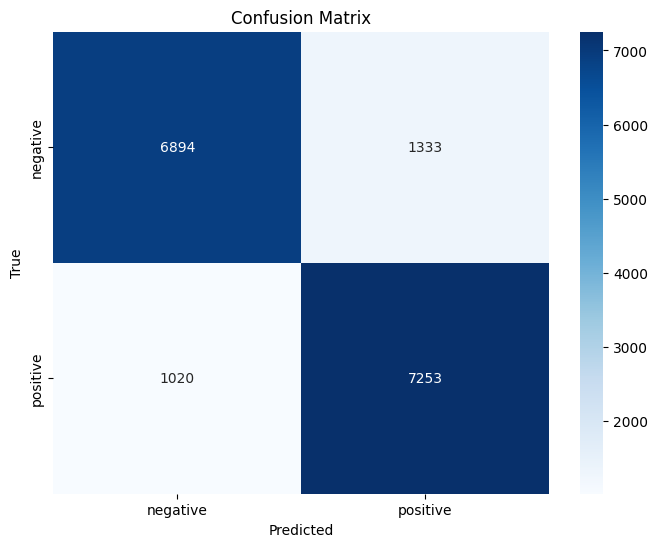

In [34]:
# Calculate the confusion matrix
conf_matrixGB = confusion_matrix(y_test_encoded, predictionXGB)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrixGB, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()